# Python for data analysis - A StarCraft II analysis

## Introduction

**Starcraft** is a real-time strategy franchise developped by the video-game company Blizzard. In this game the player takes over different military units that need to be managed on the battle field, while also focusing on the base, the source of money and new technologies for the player throughout the game. 

**Starcraft 2**  throws the player into a futuristic  world in which 3 factions battle off for their survival and power of the world. Each faction has its own strenghts and weaknesses, it's up to the player to take advantages of them.
The world of StarCraft 2 materialize through small maps with different topologies and on which players can fight eachother, whether by a duel or in teams.
There are 2 very different game mode. The first is the solo campaign, in which the player fights his way through the game story against bots. The second, the most popular, is the multiplayer mode, any player anywhere in the world can fight any other player anywhere in the world (in reality ping limits this but theoratically it's possible) thanks to a matchmaking whereupon the most casual player can matchup professional players if they are in the same league.
The league matchmaking is an elo-like system. To put this in a simple way, when a player wins a matchmaking game, his elo goes up, when he loses, his elo goes down. This system, first used for chess, is very efficient and ensures (usually) that the best players get a high elo, and the beginners a low elo. This allows players to play versus other player who have pretty much the same skill as them and sets up, most of the time, a competitive game in which all the players will have a fun and competitive time.

The dataset (https://archive.ics.uci.edu/ml/datasets/SkillCraft1+Master+Table+Dataset) focuses on the multiplayer gamemode. The data was collected thanks to a survey and each player had to manually enter his statistics, it was not done automatically. It is composed of 20 variables for 3395 players, 55 of which were professional players and data was collected through replays of their professional games. 
The goal is to predict the league of a player based on these 20 statistics and game variables.

## Importing the necessary libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split, RandomizedSearchCV, RepeatedStratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score
from sklearn import preprocessing


from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

import seaborn as sns
from matplotlib.ticker import FuncFormatter
import pickle
import joblib

## Data Analysis

In [6]:
df = pd.read_csv("SkillCraft1_Dataset.csv")
df

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.000000,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.000000,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.000000,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.000000,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,10089,8,?,?,?,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46,0.000877,5,0.000000,0.000000
3391,10090,8,?,?,?,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16,0.000788,4,0.000000,0.000000
3392,10092,8,?,?,?,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000
3393,10094,8,?,?,?,375.8664,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15,0.000613,6,0.000000,0.000631


Dataset description : 
1. GameID: Unique ID number for each game (integer)
2. LeagueIndex: Bronze, Silver, Gold, Platinum, Diamond, Master, GrandMaster, and Professional leagues coded 1-8 (Ordinal)
3. Age: Age of each player (integer)
4. HoursPerWeek: Reported hours spent playing per week (integer)
5. TotalHours: Reported total hours spent playing (integer)
6. APM: Action per minute (continuous)
7. SelectByHotkeys: Number of unit or building selections made using hotkeys per timestamp (continuous)
8. AssignToHotkeys: Number of units or buildings assigned to hotkeys per timestamp (continuous)
9. UniqueHotkeys: Number of unique hotkeys used per timestamp (continuous)
10. MinimapAttacks: Number of attack actions on minimap per timestamp (continuous)
11. MinimapRightClicks: number of right-clicks on minimap per timestamp (continuous)
12. NumberOfPACs: Number of PACs per timestamp (continuous)
13. GapBetweenPACs: Mean duration in milliseconds between PACs (continuous)
14. ActionLatency: Mean latency from the onset of a PACs to their first action in milliseconds (continuous)
15. ActionsInPAC: Mean number of actions within each PAC (continuous)
16. TotalMapExplored: The number of 24x24 game coordinate grids viewed by the player per timestamp (continuous)
17. WorkersMade: Number of SCVs, drones, and probes trained per timestamp (continuous)
18. UniqueUnitsMade: Unique unites made per timestamp (continuous)
19. ComplexUnitsMade: Number of ghosts, infestors, and high templars trained per timestamp (continuous)
20. ComplexAbilitiesUsed: Abilities requiring specific targeting instructions used per timestamp (continuous)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3395 non-null   int64  
 1   LeagueIndex           3395 non-null   int64  
 2   Age                   3395 non-null   object 
 3   HoursPerWeek          3395 non-null   object 
 4   TotalHours            3395 non-null   object 
 5   APM                   3395 non-null   float64
 6   SelectByHotkeys       3395 non-null   float64
 7   AssignToHotkeys       3395 non-null   float64
 8   UniqueHotkeys         3395 non-null   int64  
 9   MinimapAttacks        3395 non-null   float64
 10  MinimapRightClicks    3395 non-null   float64
 11  NumberOfPACs          3395 non-null   float64
 12  GapBetweenPACs        3395 non-null   float64
 13  ActionLatency         3395 non-null   float64
 14  ActionsInPAC          3395 non-null   float64
 15  TotalMapExplored     

As we can see, Age, HoursPerWeek and TotalHours are objects because they contain '?' values. For the purpose of the prediction, these need to be set to int so algorithms can deal with them better, but for the data visualization we will just ignore these rows, later we will modify them.

In [5]:
dataVizuAHT = df.replace('?', np.nan)
dataVizuAHT = dataVizuAHT.dropna()

dataVizuAHT[['Age', 'HoursPerWeek', 'TotalHours']] = dataVizuAHT[['Age', 'HoursPerWeek', 'TotalHours']].astype(int)
dataVizuAHT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3338 entries, 0 to 3339
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3338 non-null   int64  
 1   LeagueIndex           3338 non-null   int64  
 2   Age                   3338 non-null   int32  
 3   HoursPerWeek          3338 non-null   int32  
 4   TotalHours            3338 non-null   int32  
 5   APM                   3338 non-null   float64
 6   SelectByHotkeys       3338 non-null   float64
 7   AssignToHotkeys       3338 non-null   float64
 8   UniqueHotkeys         3338 non-null   int64  
 9   MinimapAttacks        3338 non-null   float64
 10  MinimapRightClicks    3338 non-null   float64
 11  NumberOfPACs          3338 non-null   float64
 12  GapBetweenPACs        3338 non-null   float64
 13  ActionLatency         3338 non-null   float64
 14  ActionsInPAC          3338 non-null   float64
 15  TotalMapExplored     

Now let's look at the league distribution

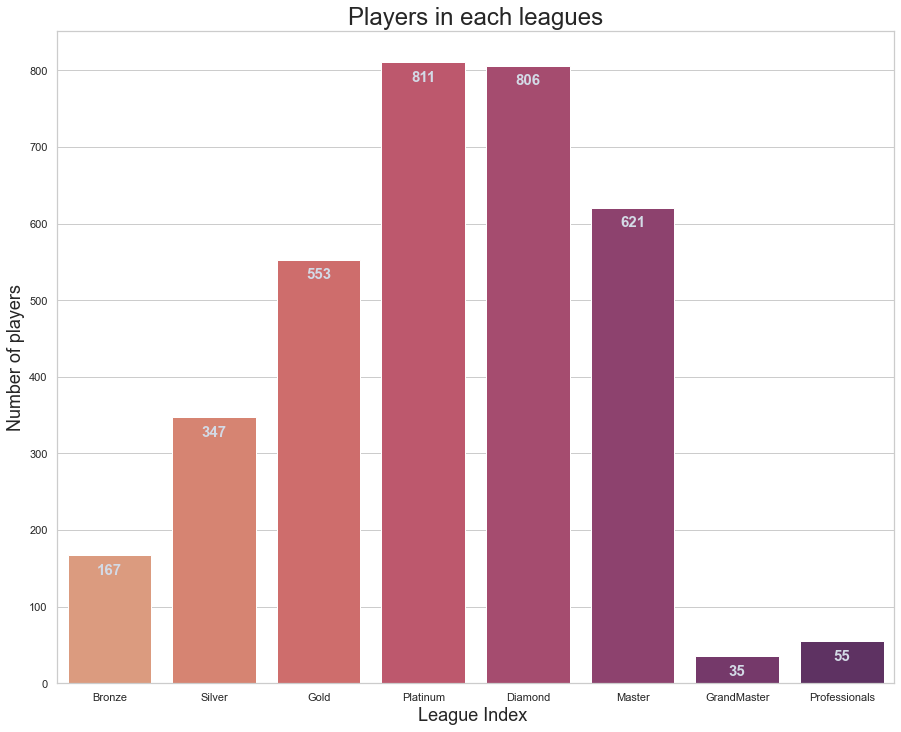

In [6]:
sns.set(rc={'figure.figsize':(15, 12)})
sns.set_theme(style="whitegrid")

ax = sns.countplot(x="LeagueIndex", data = df, palette="flare")
plt.title("Players in each leagues", fontsize =24)
plt.ylabel('Number of players', fontsize=18)
plt.xlabel('League Index ', fontsize=18)
ax.set_xticklabels(['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master', 'GrandMaster', 'Professionals'])
for p in ax.patches:
        ax.annotate('{:d}'.format(p.get_height()), xy=(p.get_x() + 0.4, p.get_height() - 20), fontsize=15, color='#d3dae6', ha='center', va="center", weight='bold')


Before we dive deep into the important variables, we will quickly go through Age/HoursPerWeek/TotalHours to see if they hold any sort of importance.

<ipython-input-7-a1d3970059e1>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master', 'GrandMaster'])


Text(0, 0.5, 'Age')

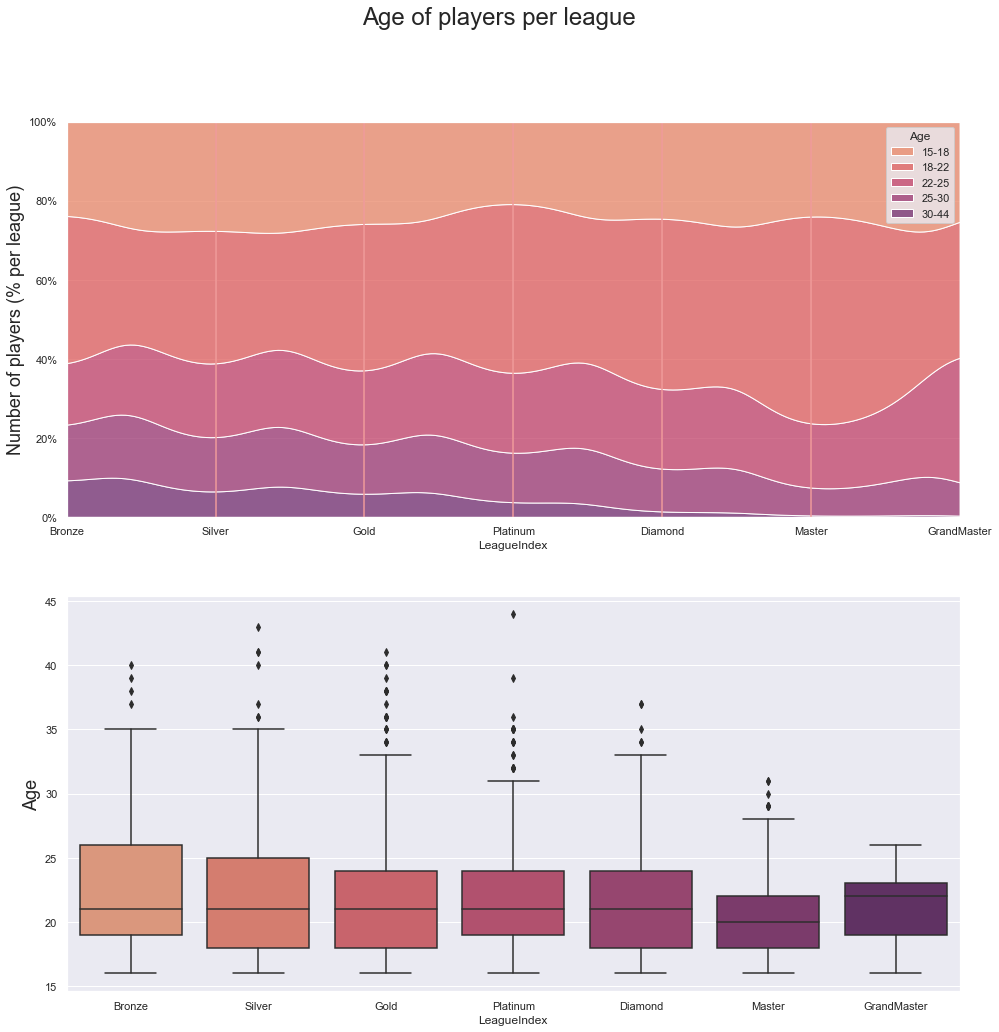

In [7]:
dfInterval = dataVizuAHT.copy()

dfInterval.Age = pd.cut(dataVizuAHT.Age, bins=[15, 18, 22, 25, 30, 45], 
                        include_lowest=True, precision=0, ordered = False, 
                        labels = ["15-18", "18-22", "22-25", "25-30", "30-44", ])

sns.set(rc={'figure.figsize':(16, 16)})

fig, axs = plt.subplots(2)
fig.suptitle('Age of players per league', fontsize =24)

ax1 = sns.kdeplot(ax = axs[0], x="LeagueIndex", hue="Age", data = dfInterval, shade=True, palette="flare", cut=0, multiple="fill")

for xx in range(2, 7):
    ax1.axvline(x=xx,color='#EF9A9A')

ax1.set_xticklabels(['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master', 'GrandMaster'])
ax1.set_ylabel('Number of players (% per league)', fontsize=18)
ax1.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

ax2 = sns.boxplot(ax = axs[1], x="LeagueIndex", y="Age", data=dataVizuAHT,palette='flare')

ax2.set_xticklabels(['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master', 'GrandMaster'])
ax2.set_ylabel('Age', fontsize=18)



<ipython-input-8-cbc0623611d9>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master', 'GrandMaster', 'Professionals'])


Text(0, 0.5, 'Hours per week')

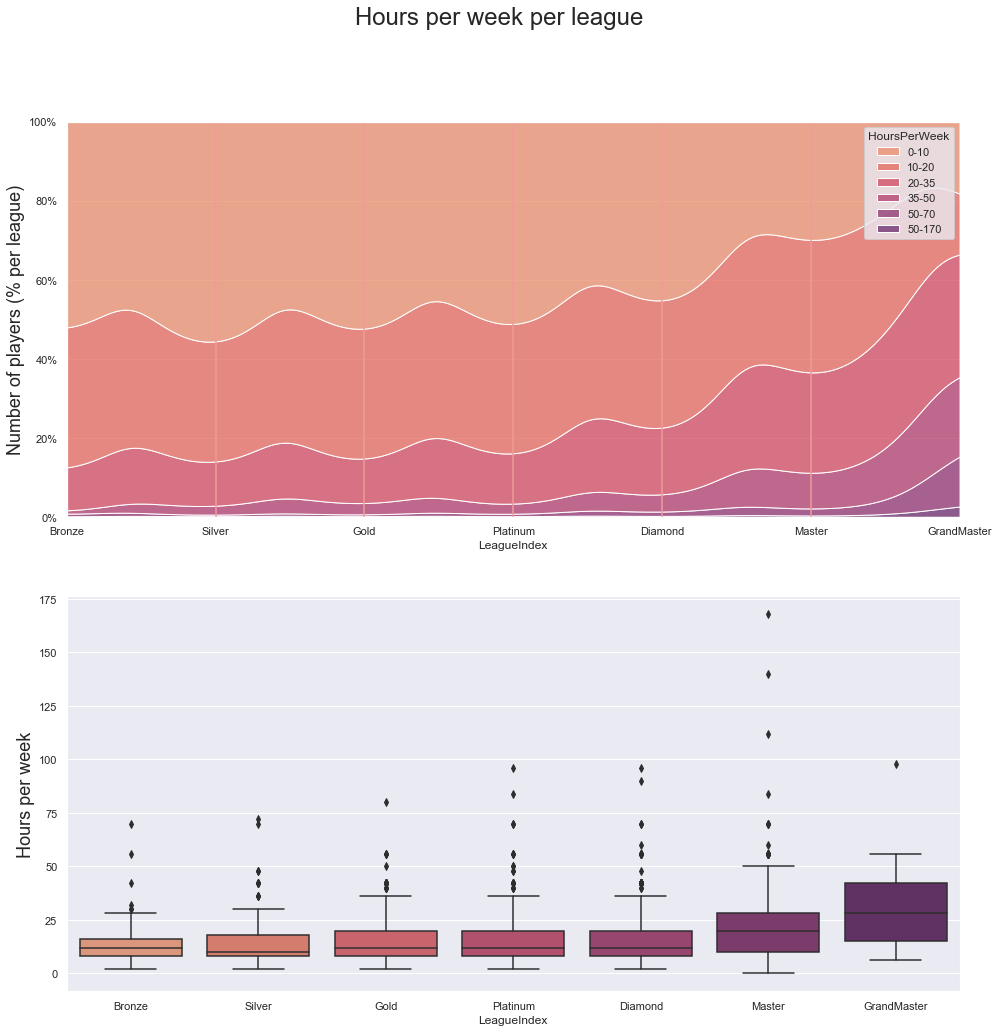

In [8]:
dfInterval.HoursPerWeek = pd.cut(dataVizuAHT.HoursPerWeek, bins=[0, 10, 20, 35, 50, 70, 170], 
                        include_lowest=True, precision=0, ordered = False, 
                                 labels = ["0-10", "10-20", "20-35", "35-50", "50-70", "50-170"])


sns.set(rc={'figure.figsize':(16, 16)})

fig, axs = plt.subplots(2)
fig.suptitle('Hours per week per league', fontsize =24)


ax1 = sns.kdeplot(ax = axs[0], x="LeagueIndex", hue="HoursPerWeek", data = dfInterval, palette="flare", multiple="fill", cut=0)
ax1.set_ylabel('Number of players (% per league)', fontsize=18)
ax1.set_xticklabels(['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master', 'GrandMaster', 'Professionals'])
ax1.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
for xx in range(2, 7):
    ax1.axvline(x=xx,color='#EF9A9A')


ax2 = sns.boxplot(ax = axs[1], x="LeagueIndex", y="HoursPerWeek", data=dataVizuAHT,palette='flare')
ax2.set_xticklabels(['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master', 'GrandMaster'])
ax2.set_ylabel('Hours per week', fontsize=18)




<ipython-input-9-87619cb2761b>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master', 'GrandMaster'])


Text(0, 0.5, 'Total hours')

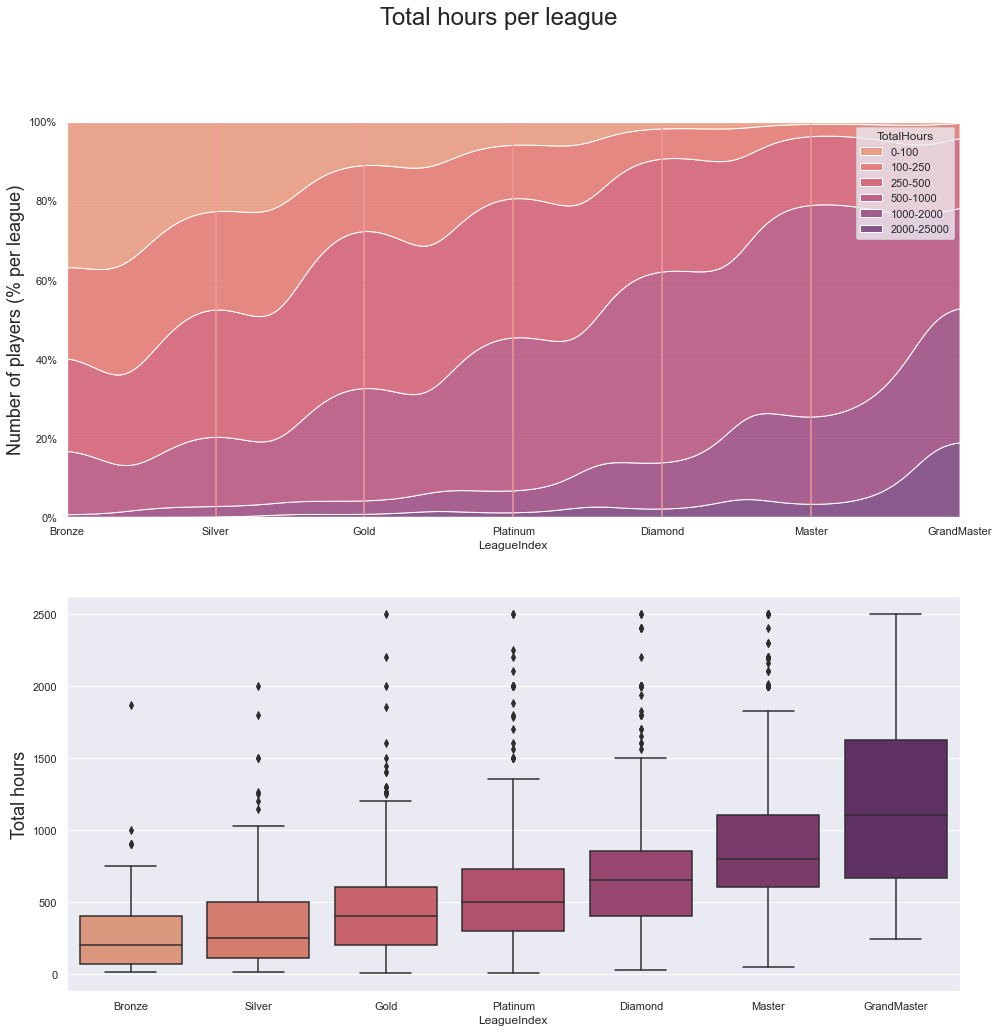

In [9]:
dfInterval.TotalHours = pd.cut(dataVizuAHT.TotalHours, bins=[0, 100,250, 500, 1000, 2000, 25000], 
                        include_lowest=True, precision=0, ordered = False, 
                               labels = ["0-100", "100-250", "250-500", "500-1000", "1000-2000", "2000-25000"])

sns.set(rc={'figure.figsize':(16, 16)})

fig, axs = plt.subplots(2)
fig.suptitle('Total hours per league', fontsize =24)

ax1 = sns.kdeplot(ax = axs[0], x="LeagueIndex", hue="TotalHours", data = dfInterval, shade=True, palette="flare", cut=0, multiple="fill")
ax1.set_ylabel('Number of players (% per league)', fontsize=18)
ax1.set_xticklabels(['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master', 'GrandMaster'])
ax1.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
for xx in range(2, 7):
    ax1.axvline(x=xx,color='#EF9A9A')

dataVizuAHT = dataVizuAHT[dataVizuAHT["TotalHours"] < dataVizuAHT["TotalHours"].quantile(0.99)]

ax2 = sns.boxplot(ax = axs[1], x="LeagueIndex", y="TotalHours", data=dataVizuAHT,palette='flare')
ax2.set_xticklabels(['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master', 'GrandMaster'])
ax2.set_ylabel('Total hours', fontsize=18)



###### On this last plot we had to filter out some extreme values to get better plots.

As we can see, these variables could be very interesting, especially for higher leagues. So we will keep them. But first we need to adress the NaN data issue with those variables. We know that they impact pretty much only professional players. We will try to follow the trends with these variable to fill the voids.

In [8]:
df.Age = df.Age.replace("?", df[df.Age != '?'].Age.median())

df.HoursPerWeek = df.HoursPerWeek.replace("?", df[df.HoursPerWeek != '?'][df.LeagueIndex == 7].HoursPerWeek.median())

df.TotalHours = df.TotalHours.replace("?", df[df.TotalHours != '?'][df.LeagueIndex == 7].TotalHours.median())



df[['Age', 'HoursPerWeek', 'TotalHours']] = df[['Age', 'HoursPerWeek', 'TotalHours']].astype(int)

<ipython-input-8-ede18f9a9f39>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.HoursPerWeek = df.HoursPerWeek.replace("?", df[df.HoursPerWeek != '?'][df.LeagueIndex == 7].HoursPerWeek.median())
<ipython-input-8-ede18f9a9f39>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.TotalHours = df.TotalHours.replace("?", df[df.TotalHours != '?'][df.LeagueIndex == 7].TotalHours.median())


So here we decided to use the values of the grandmasters and port them to the professionals as we feel this would be more accurate than just picking the median value of all the dataset.
We obviously couldn't remove all the rows associated with these NaN values as this would mean no more professionals to look at..


###### Now we will look at the other variables, this time taking the professionals data into account

[Text(0, 0, 'Bronze'),
 Text(1, 0, 'Silver'),
 Text(2, 0, 'Gold'),
 Text(3, 0, 'Platinum'),
 Text(4, 0, 'Diamond'),
 Text(5, 0, 'Master'),
 Text(6, 0, 'GrandMaster'),
 Text(7, 0, 'Professionals')]

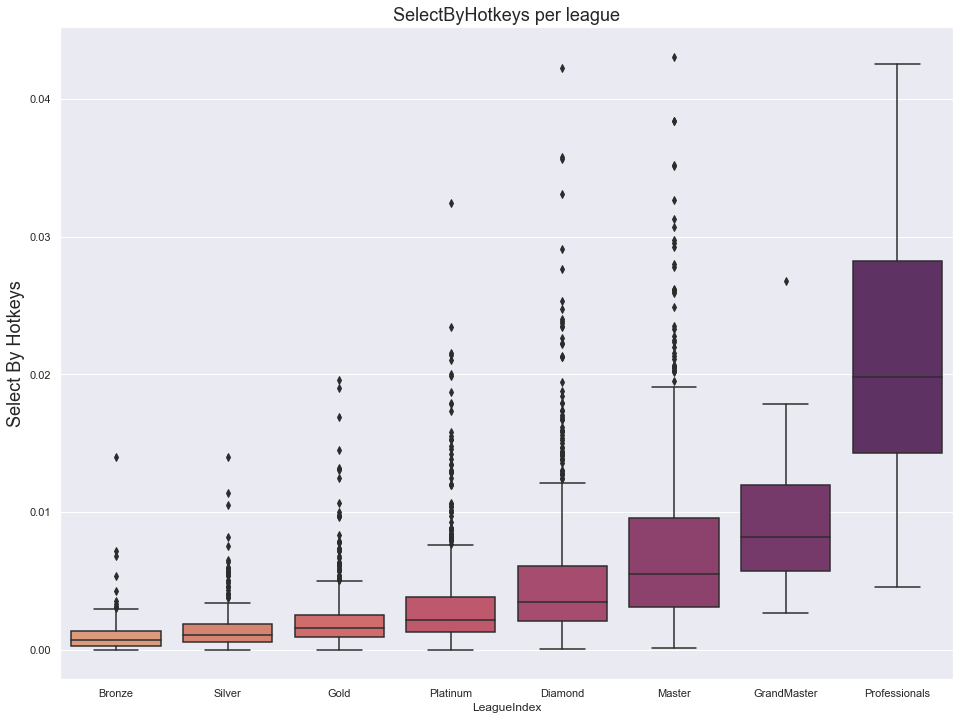

In [11]:
sns.set(rc={'figure.figsize':(16, 12)})

ax = sns.boxplot(x="LeagueIndex", y="SelectByHotkeys", data=df,palette='flare')
plt.ylabel('Select By Hotkeys', fontsize=18)
plt.title('SelectByHotkeys per league', fontsize=18)
ax.set_xticklabels(['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master', 'GrandMaster', 'Professionals'])

This variable (SelectByHotKeys) is the number of unit or building selections made using hotkeys per timestamp (continuous). This means that the player must know his shortcuts to use them wisely. Unsurprisingly, a novice player will use his mouse rather than his shortcuts. The correlation is huge, there is a real gap between the professional players and the rest.

[Text(0, 0, 'Bronze'),
 Text(1, 0, 'Silver'),
 Text(2, 0, 'Gold'),
 Text(3, 0, 'Platinum'),
 Text(4, 0, 'Diamond'),
 Text(5, 0, 'Master'),
 Text(6, 0, 'GrandMaster'),
 Text(7, 0, 'Professionals')]

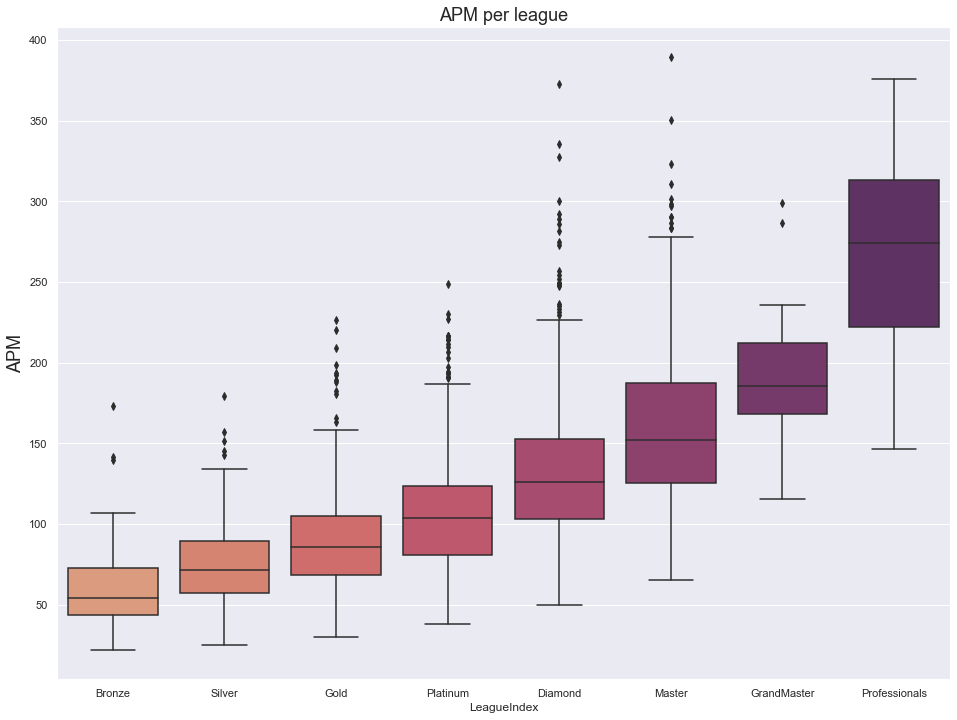

In [12]:
ax = sns.boxplot(x="LeagueIndex", y="APM", data=df,palette='flare')
plt.ylabel('APM', fontsize=18)
plt.title('APM per league', fontsize=18)
ax.set_xticklabels(['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master', 'GrandMaster', 'Professionals'])

###### APMs stand for "Action Per Minute". 
In Starcraft you have to manage tons of units in real-time so it's completely logical that the better you are, the more things per seconds you are able to do.

[Text(0, 0, 'Bronze'),
 Text(1, 0, 'Silver'),
 Text(2, 0, 'Gold'),
 Text(3, 0, 'Platinum'),
 Text(4, 0, 'Diamond'),
 Text(5, 0, 'Master'),
 Text(6, 0, 'GrandMaster'),
 Text(7, 0, 'Professionals')]

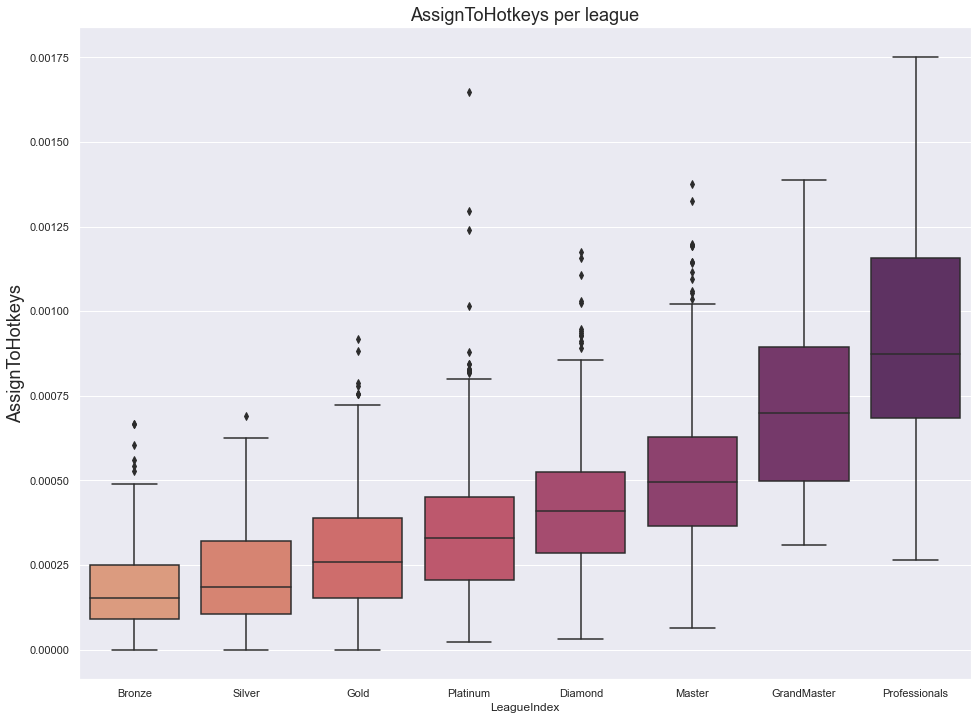

In [13]:
ax = sns.boxplot(x="LeagueIndex", y="AssignToHotkeys", data=df,palette='flare')
plt.ylabel('AssignToHotkeys', fontsize=18)
plt.title('AssignToHotkeys per league', fontsize=18)
ax.set_xticklabels(['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master', 'GrandMaster', 'Professionals'])

##### This variable 'Assign to Hotkeys' is the number of units or buildings assigned to hotkeys per timestamp (continuous).
The correlation is once again strong here

[Text(0, 0, 'Bronze'),
 Text(1, 0, 'Silver'),
 Text(2, 0, 'Gold'),
 Text(3, 0, 'Platinum'),
 Text(4, 0, 'Diamond'),
 Text(5, 0, 'Master'),
 Text(6, 0, 'GrandMaster'),
 Text(7, 0, 'Professionals')]

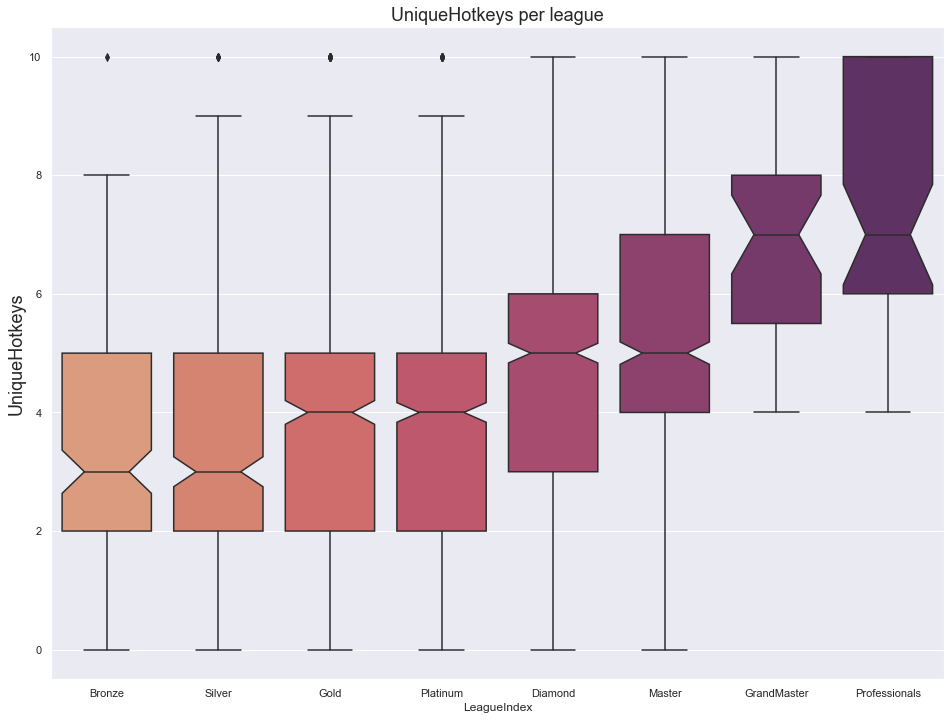

In [14]:
ax = sns.boxplot(x="LeagueIndex", y="UniqueHotkeys", data=df,palette='flare', notch=True)
plt.ylabel('UniqueHotkeys', fontsize=18)
plt.title('UniqueHotkeys per league', fontsize=18)
ax.set_xticklabels(['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master', 'GrandMaster', 'Professionals'])

##### This variable 'Unique Hotkeys' is the number of unique hotkeys used per timestamp (continuous)
From the diamond rank onwards, the number of different shortcuts used is correlated with the rank.
The game only allows for a maximum of 10 shortcuts so professional players are limited.

[Text(0, 0, 'Bronze'),
 Text(1, 0, 'Silver'),
 Text(2, 0, 'Gold'),
 Text(3, 0, 'Platinum'),
 Text(4, 0, 'Diamond'),
 Text(5, 0, 'Master'),
 Text(6, 0, 'GrandMaster'),
 Text(7, 0, 'Professionals')]

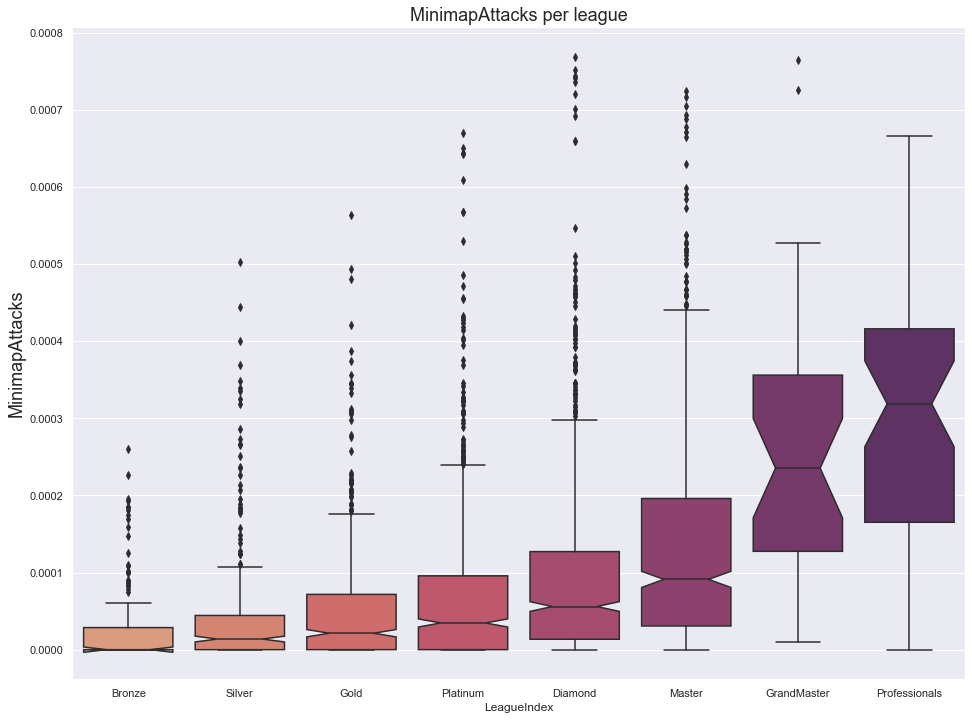

In [15]:

ax = sns.boxplot(x="LeagueIndex", y="MinimapAttacks", data=df[df["MinimapAttacks"] < df["MinimapAttacks"].quantile(0.99)],palette='flare', notch=True)
plt.ylabel('MinimapAttacks', fontsize=18)
plt.title('MinimapAttacks per league', fontsize=18)
ax.set_xticklabels(['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master', 'GrandMaster', 'Professionals'])

#####  'Minimap Attacks' is the number of attack actions on minimap per timestamp (continuous).
We did have to remove some extreme variables to get a better view of the correlation here. So as we can see, the best players are those who do the most attacking via the minimap. 

[Text(0, 0, 'Bronze'),
 Text(1, 0, 'Silver'),
 Text(2, 0, 'Gold'),
 Text(3, 0, 'Platinum'),
 Text(4, 0, 'Diamond'),
 Text(5, 0, 'Master'),
 Text(6, 0, 'GrandMaster'),
 Text(7, 0, 'Professionals')]

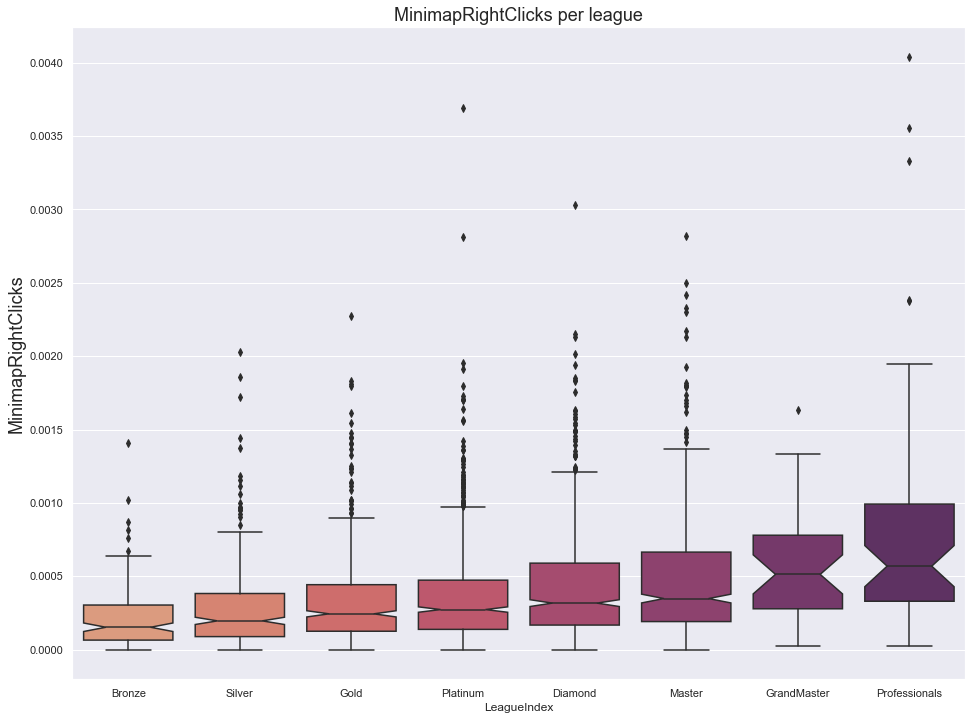

In [16]:
ax = sns.boxplot(x="LeagueIndex", y="MinimapRightClicks", data=df,palette='flare', notch=True)
plt.ylabel('MinimapRightClicks', fontsize=18)
plt.title('MinimapRightClicks per league', fontsize=18)
ax.set_xticklabels(['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master', 'GrandMaster', 'Professionals'])

##### The right click allows you to do many things on this game. Not surprisingly, those who are able to use the right click via minimap and do the most are the best players.

[Text(0, 0, 'Bronze'),
 Text(1, 0, 'Silver'),
 Text(2, 0, 'Gold'),
 Text(3, 0, 'Platinum'),
 Text(4, 0, 'Diamond'),
 Text(5, 0, 'Master'),
 Text(6, 0, 'GrandMaster'),
 Text(7, 0, 'Professionals')]

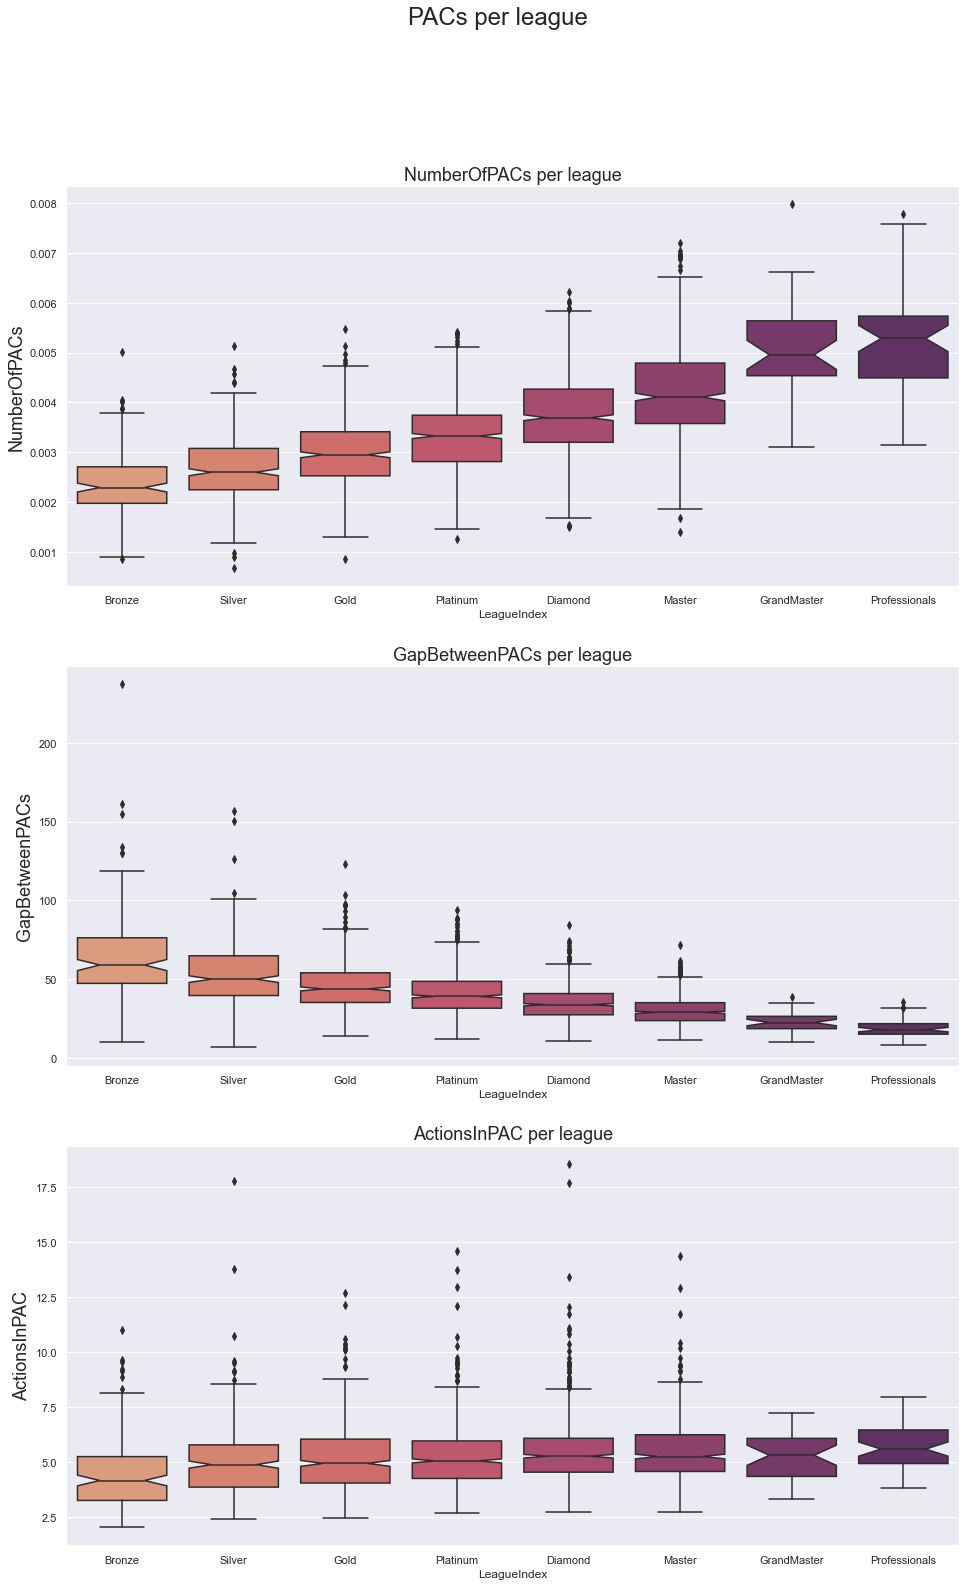

In [17]:
sns.set(rc={'figure.figsize':(16, 25)})

fig, axs = plt.subplots(3)
fig.suptitle('PACs per league', fontsize =24)


ax1 = sns.boxplot(ax = axs[0], x="LeagueIndex", y="NumberOfPACs", data=df,palette='flare', notch=True)
ax1.set_ylabel('NumberOfPACs', fontsize=18)
ax1.set_title('NumberOfPACs per league', fontsize=18)
ax1.set_xticklabels(['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master', 'GrandMaster', 'Professionals'])

ax1 = sns.boxplot(ax = axs[1], x="LeagueIndex", y="GapBetweenPACs", data=df,palette='flare', notch=True)
ax1.set_ylabel('GapBetweenPACs', fontsize=18)
ax1.set_title('GapBetweenPACs per league', fontsize=18)
ax1.set_xticklabels(['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master', 'GrandMaster', 'Professionals'])

ax1 = sns.boxplot(ax = axs[2], x="LeagueIndex", y="ActionsInPAC", data=df,palette='flare', notch=True)
ax1.set_ylabel('ActionsInPAC', fontsize=18)
ax1.set_title('ActionsInPAC per league', fontsize=18)
ax1.set_xticklabels(['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master', 'GrandMaster', 'Professionals'])



###### Perception Action Cycle is apparently a very well-known indicator in the world of competitive video games.
A bit like APMs, the more PACs you have, the better you are at the game.

[Text(0, 0, 'Bronze'),
 Text(1, 0, 'Silver'),
 Text(2, 0, 'Gold'),
 Text(3, 0, 'Platinum'),
 Text(4, 0, 'Diamond'),
 Text(5, 0, 'Master'),
 Text(6, 0, 'GrandMaster'),
 Text(7, 0, 'Professionals')]

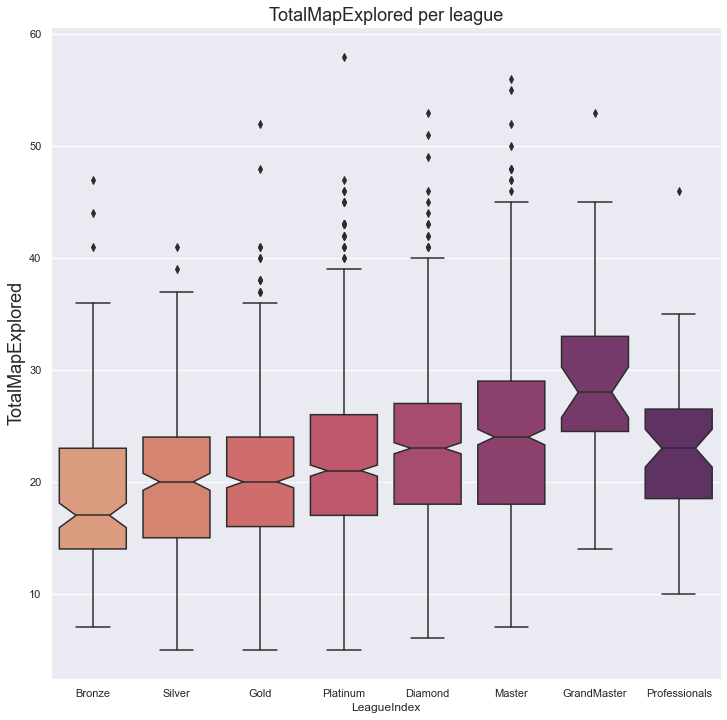

In [18]:
sns.set(rc={'figure.figsize':(12, 12)})

ax = sns.boxplot(x="LeagueIndex", y="TotalMapExplored", data=df,palette='flare', notch=True)
plt.ylabel('TotalMapExplored', fontsize=18)
plt.title('TotalMapExplored per league', fontsize=18)
ax.set_xticklabels(['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master', 'GrandMaster', 'Professionals'])

###### 'Total Map Explored' is the number of 24x24 game coordinate grids viewed by the player per timestamp (continuous).
This variable is positively correlated with the player's rank, up to the grandmaster rank, after that it seems that the best players explore the map less.
This may be due to the fact that professional players need to explore less before attacking. They are more efficient in their exploration and therefore have better information about the enemies.
Perhaps the professional level games are shorter and therefore leave less time to explore the map.

[Text(0, 0, 'Bronze'),
 Text(1, 0, 'Silver'),
 Text(2, 0, 'Gold'),
 Text(3, 0, 'Platinum'),
 Text(4, 0, 'Diamond'),
 Text(5, 0, 'Master'),
 Text(6, 0, 'GrandMaster'),
 Text(7, 0, 'Professionals')]

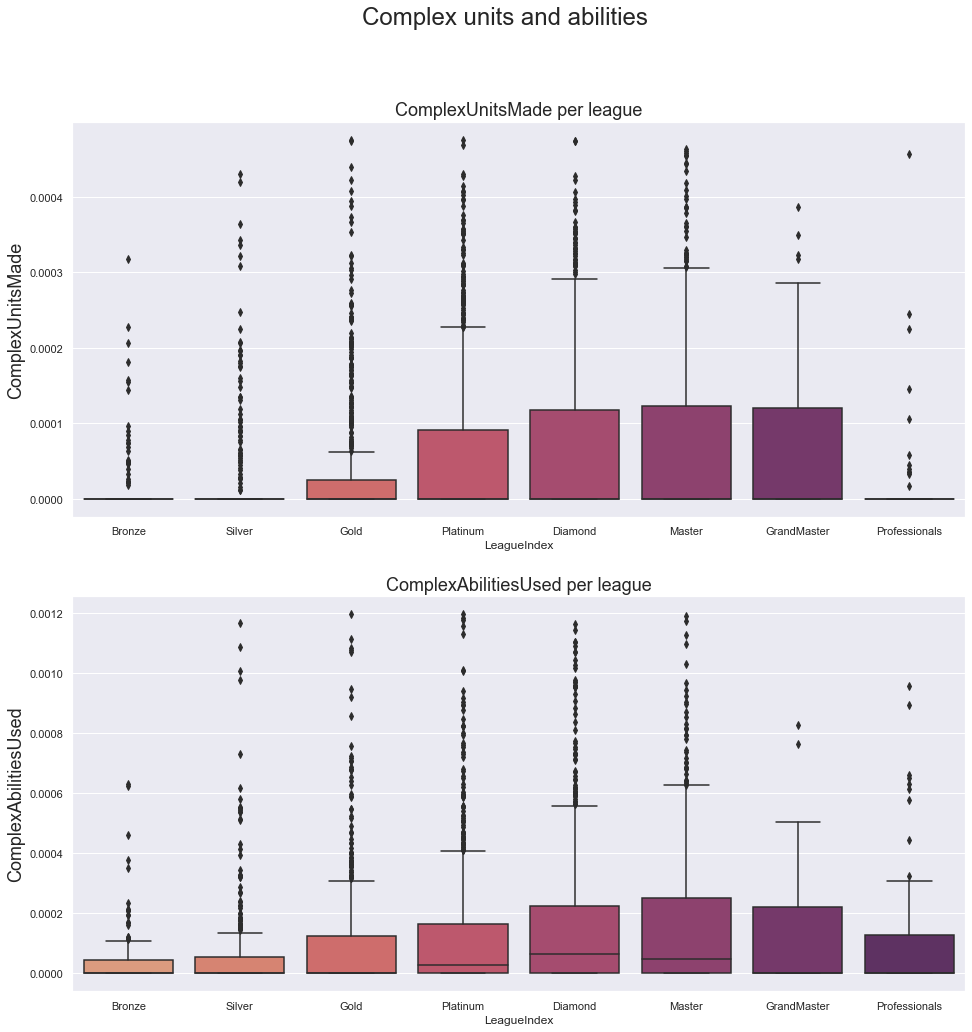

In [19]:
sns.set(rc={'figure.figsize':(16, 16)})

fig, axs = plt.subplots(2)
fig.suptitle('Complex units and abilities', fontsize =24)


ax1 = sns.boxplot(ax = axs[0], x="LeagueIndex", y="ComplexUnitsMade", data=df[df["ComplexUnitsMade"] < df["ComplexUnitsMade"].quantile(0.99)],palette='flare')
ax1.set_ylabel('ComplexUnitsMade', fontsize=18)
ax1.set_title('ComplexUnitsMade per league', fontsize=18)
ax1.set_xticklabels(['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master', 'GrandMaster', 'Professionals'])

ax2 = sns.boxplot(ax = axs[1], x="LeagueIndex", y="ComplexAbilitiesUsed", data=df[df["ComplexAbilitiesUsed"] < df["ComplexAbilitiesUsed"].quantile(0.99)],palette='flare')
ax2.set_ylabel('ComplexAbilitiesUsed', fontsize=18)
ax2.set_title('ComplexAbilitiesUsed per league', fontsize=18)
ax2.set_xticklabels(['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master', 'GrandMaster', 'Professionals'])


This one is rather interesting, there is a clear difference between bad players (bronze, silver, gold) and good players (platinium and upwards) except for professionals. Professional leagues are sometimes closed circuit and the same players keep playing themselves over and over again, maybe a meta starts developping in which complexunits are not needed.

##### Pairplot


C:\Users\Francois\anaconda3\lib\site-packages\seaborn\distributions.py:1182: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
C:\Users\Francois\anaconda3\lib\site-packages\seaborn\distributions.py:1182: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


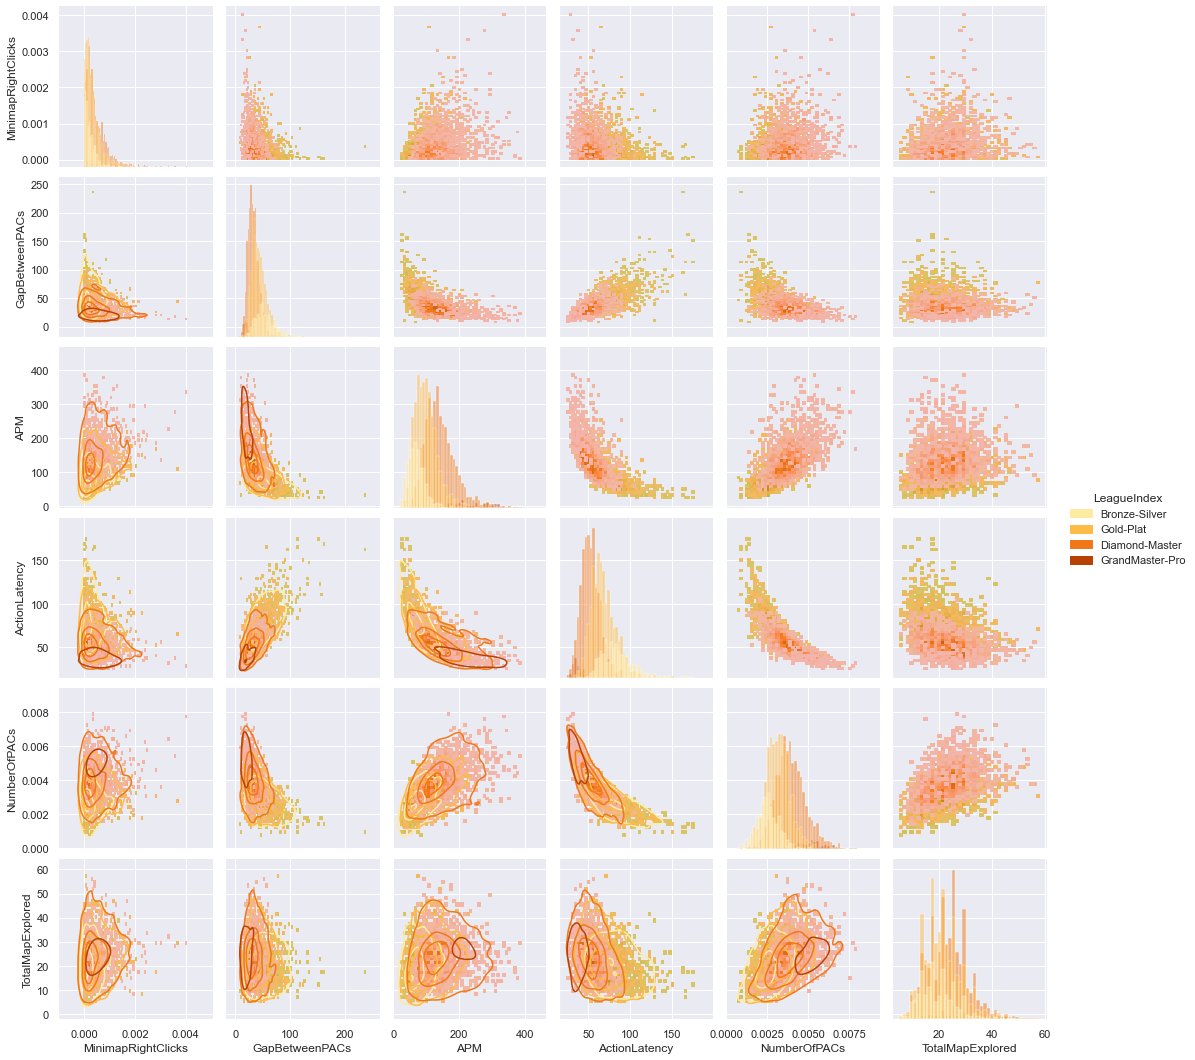

In [20]:
dfIntervalLeagueIndex = df.copy()

dfIntervalLeagueIndex.LeagueIndex = pd.cut(dfIntervalLeagueIndex.LeagueIndex, bins=[1, 2, 4, 6, 8], 
                                           labels=["Bronze-Silver", "Gold-Plat", "Diamond-Master", "GrandMaster-Pro"], include_lowest=True, precision=0)


sns.set(rc={'figure.figsize':(40,30)})

g = sns.pairplot(
    dfIntervalLeagueIndex, vars=[
    'MinimapRightClicks', 
    'GapBetweenPACs', 
    'APM', 
    'ActionLatency',
    'NumberOfPACs',
    'TotalMapExplored'
    ]
    , 
    hue='LeagueIndex',
    kind = "hist",
    palette="YlOrBr"
)
g.map_lower(sns.kdeplot, levels=4, color=".2")

Here we merged the leagues closed to each other to get a better view of the correlations between each variables. Some are interesting like ActionLatency where leagues are the most clearly defined out of all the variables

##### Boxplots in one

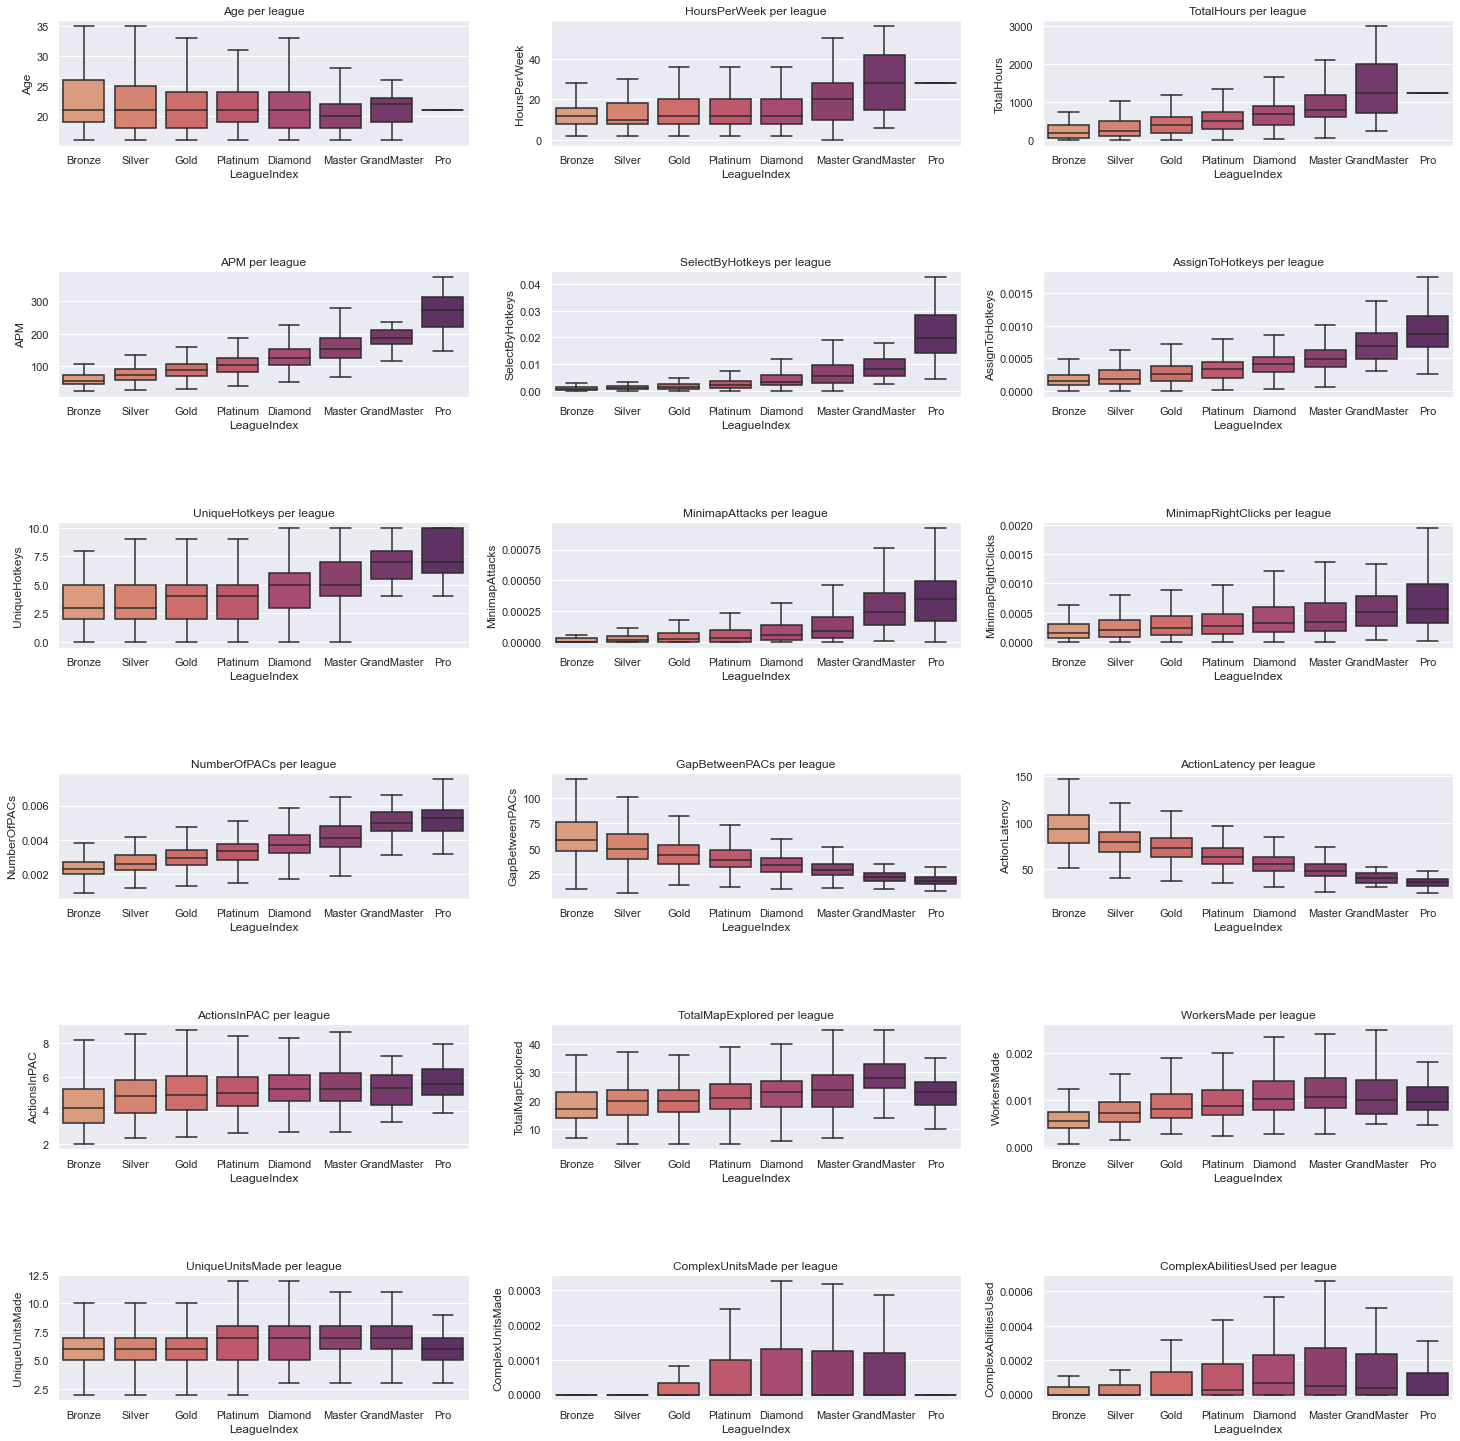

In [21]:
fig = plt.figure(figsize=(25, 30))
fig.subplots_adjust(hspace = 1)
for column in range(1, len(df.columns)):
    if ((df.columns[column] == 'LeagueIndex')):
        continue
    fig.add_subplot(7, 3, column - 1)
    title = ("{0} per league".format(df.columns[column]))
    ax = sns.boxplot(x = "LeagueIndex", y = df.columns[column], data = df, showfliers = False, palette='flare')
    ax.set_title(title)
    ax.set_xticklabels(['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master', 'GrandMaster', 'Pro'])
    
plt.show()

#### Heatmap correlation between variables

<AxesSubplot:>

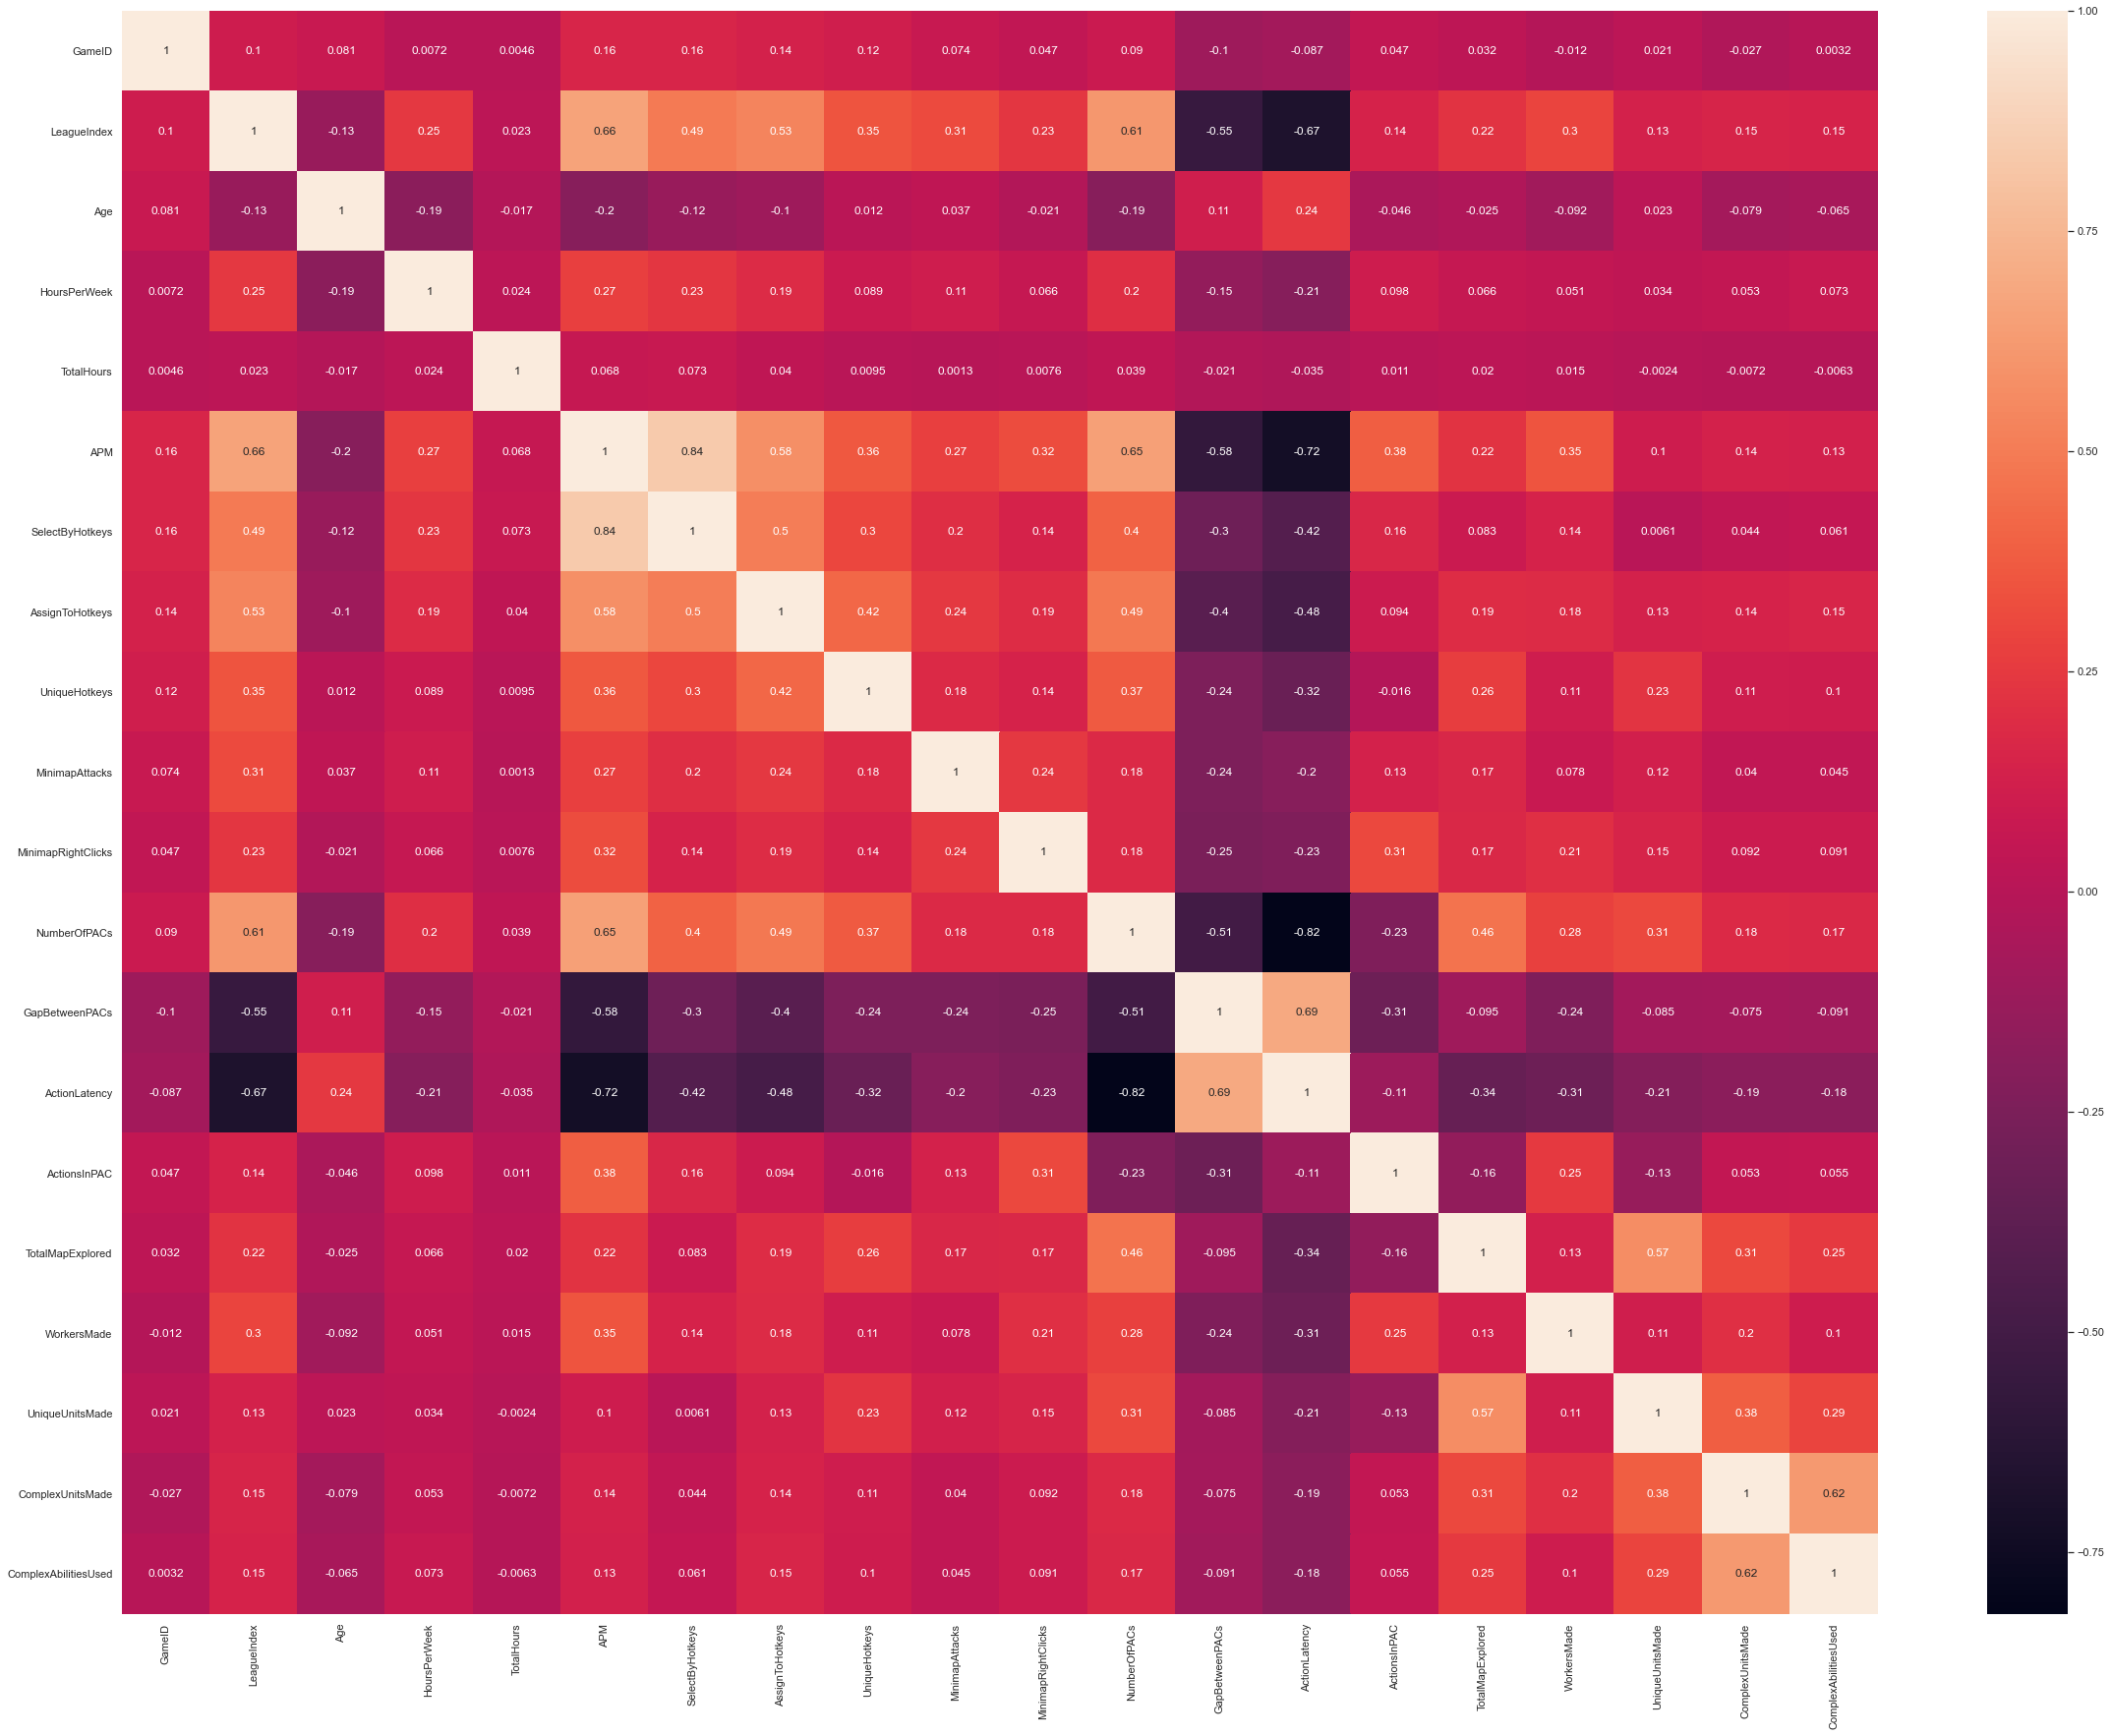

In [22]:
sns.heatmap(df.corr(), annot=True)

What could interest us here, are the second column and second line. These represent the correlation between LeaguIndex and the other variables. Some of them are more important than others but it seems like all of them play a part.

### Analysis conclusion

It seems like all the variables play a part, except the GameI maybe. This all seem logical as explained throughout the boxplots we showed

# Models

###### Accuracy function

In [23]:
def plot_confusion_matrix(actual, prediction):
    cf_mat = confusion_matrix(y_true = actual, y_pred = prediction)
    fig, ax = plt.subplots(figsize = (10, 10))
    ax.matshow(cf_mat, cmap = sns.color_palette("flare", as_cmap=True))
    for i in range(cf_mat.shape[0]):
        for j in range(cf_mat.shape[1]):
            ax.text(x = j, y = i,s = cf_mat[i, j], va = 'center', ha = 'center', size = 'xx-large')

    ax.set_xlabel('Prediction', fontsize=18)
    ax.set_ylabel('Actual', fontsize=18)
    ax.set_xticklabels(['Bronze', 'Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master', 'GrandMaster', 'Pro'])
    ax.set_yticklabels(['Bronze', 'Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master', 'GrandMaster', 'Pro'])
    return fig

In [19]:
labels = np.array(df['LeagueIndex'])

data = df.drop(['LeagueIndex', 'GameID'], axis = 'columns')

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.25, random_state = 12)

### RandomForest

[[  8  19  10   2   1   0   0   0]
 [  8  30  27  22   3   0   0   0]
 [  1  11  54  44  16   1   0   0]
 [  2   7  31  99  59  11   0   0]
 [  0   1  12  66 107  43   0   0]
 [  0   0   0   9  45  84   0   0]
 [  0   0   0   0   0   5   0   0]
 [  0   0   0   0   0   2   0   9]]
Accuracy :  0.46054181389870436


<ipython-input-23-ec75e1dd059d>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Bronze', 'Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master', 'GrandMaster', 'Pro'])
<ipython-input-23-ec75e1dd059d>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Bronze', 'Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master', 'GrandMaster', 'Pro'])
<ipython-input-25-dee4ed4d7152>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_confusion_matrix(test_labels, pred).show()


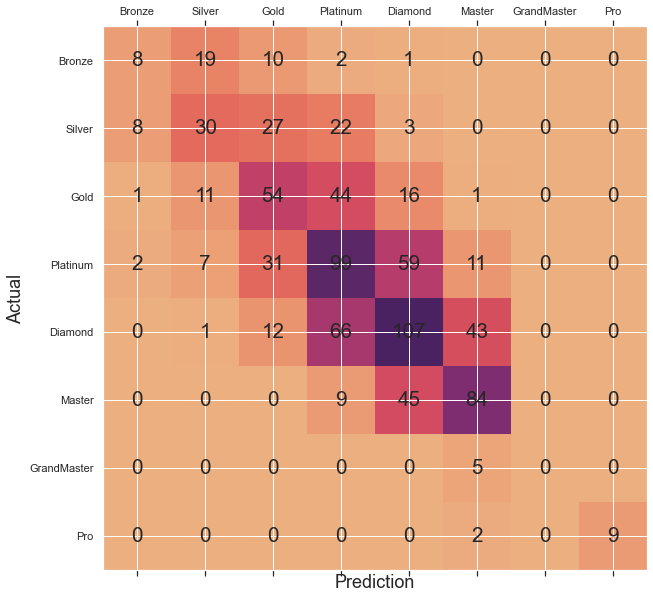

In [25]:

rf = RandomForestClassifier(n_estimators = 2000, random_state = 98)
rf.fit(train_data, train_labels);

predictions = rf.predict(test_data)


pred = [int(round(x)) for x in predictions]
conf_mat = confusion_matrix(test_labels, pred)
print(conf_mat)
print("Accuracy : ",accuracy_score(test_labels, pred))


plot_confusion_matrix(test_labels, pred).show()

###### To improve, we could try tuning randomforest to find the best hyperparameters

In [26]:
n_estimators = [2500, 5000]
# Maximum number of levels in tree
max_depth = [1, 10, 100]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 4, 8]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [2500, 5000], 'max_depth': [1, 10, 100, None], 'min_samples_split': [2, 4, 8], 'min_samples_leaf': [1, 2, 4]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf2 = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use 5 available cores
rf_random = RandomizedSearchCV(estimator = rf2, param_distributions = random_grid, n_iter = 55, cv = 3, verbose=2, random_state=18, n_jobs = 5)# Fit the random search model
rf_random.fit(train_data, train_labels)

rf_random.best_params_

Fitting 3 folds for each of 55 candidates, totalling 165 fits


###### Now let's try normalizing the data

In [36]:
scaler = preprocessing.MinMaxScaler()
data_norm = scaler.fit_transform(data.copy())
data_norm = pd.DataFrame(data_norm, columns=data.columns)

train_data_norm, test_data_norm, train_labels_norm, test_labels_norm = train_test_split(data_norm, labels, test_size = 0.25, random_state = 12)



<ipython-input-23-ec75e1dd059d>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Bronze', 'Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master', 'GrandMaster', 'Pro'])
<ipython-input-23-ec75e1dd059d>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Bronze', 'Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master', 'GrandMaster', 'Pro'])
<ipython-input-31-e03dbf5b2e6a>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_confusion_matrix(test_labels_norm, [int(round(x)) for x in predictions_norm]).show()


Accuracy :  0.46760895170789163


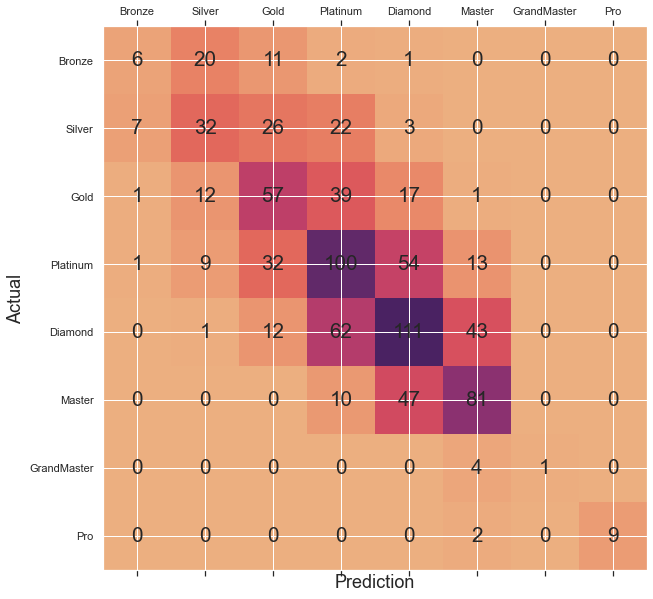

In [31]:
rf = RandomForestClassifier(n_estimators = 2500, random_state = 18, n_jobs=5, 
                           bootstrap=True, min_samples_leaf=1, min_samples_split=2, max_depth=50, max_features="auto")
rf.fit(train_data_norm, train_labels_norm);

predictions_norm = rf.predict(test_data_norm)

plot_confusion_matrix(test_labels_norm, [int(round(x)) for x in predictions_norm]).show()

print("Accuracy : ",accuracy_score(test_labels_norm, [int(round(x)) for x in predictions_norm]))

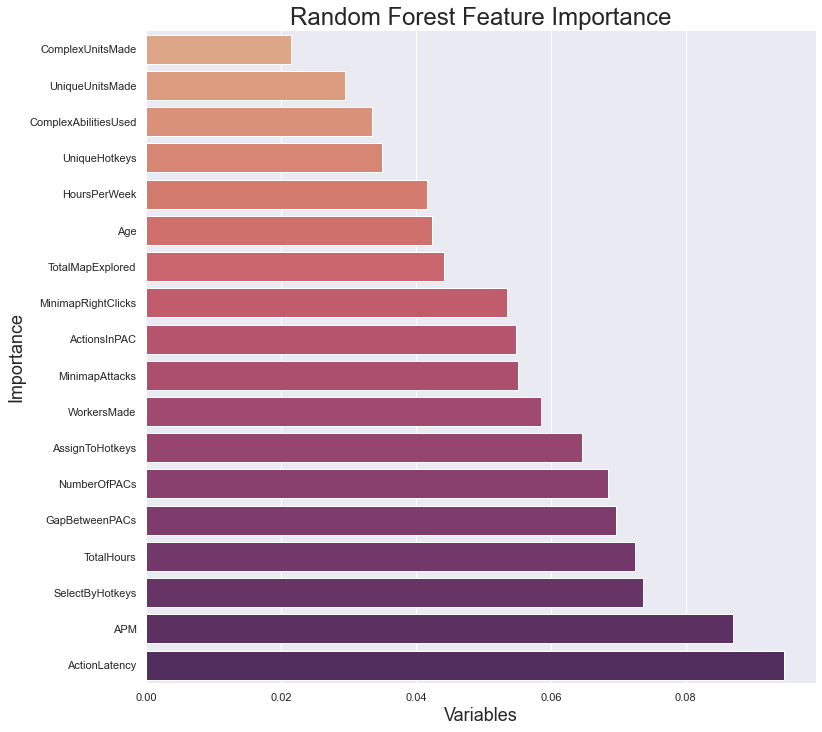

In [32]:
fig = plt.figure(figsize=(12, 12))

sorted_idx = rf.feature_importances_.argsort()

ax = sns.barplot(y=data.columns[sorted_idx], x=rf.feature_importances_[sorted_idx], palette="flare")
plt.title("Random Forest Feature Importance", fontsize =24)
plt.ylabel('Importance', fontsize=18)
plt.xlabel('Variables', fontsize=18)

sns.despine(left=True, bottom=True)


### Logistic regression

In [ ]:

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=5, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(train_data_norm, train_labels_norm)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


### KNN

In [ ]:

model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(train_data_norm, train_labels_norm)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

### SVC

In [ ]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(train_data_norm, train_labels_norm)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

### Bagging classifier

In [ ]:
model = BaggingClassifier()
n_estimators = [10, 100, 1000]
# define grid search
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(train_data_norm, train_labels_norm)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# Conclusion

The best model is the randomforest one with which we manage a 46.7% prediction rate. We will now use for our flask application

### Saving the model with pickle

In [23]:
best_model = RandomForestClassifier(n_estimators = 50, random_state = 18, n_jobs=5, 
                           bootstrap=True, min_samples_leaf=1, min_samples_split=2, max_depth=50, max_features="auto")
best_model.fit(data_norm, labels);



In [38]:
pickle.dump(best_model, open("finalized_model_test.pickle", 'wb'))

pickle.dump(scaler, open("scaler.pkl", 'wb'))

In [45]:
filename = 'finalized_model_job.sav'
joblib.dump(best_model, filename)

['finalized_model_job.sav']

In [39]:
import pickle

pickled_model = pickle.load(open('finalized_model_test.pickle', 'rb'))
scaler_test = pickle.load(open('scaler.pkl', 'rb'))
last = [df.iloc[-1][2:20]]

last_norm = scaler_test.transform(last)


print(last_norm)
test_pred = pickled_model.predict(last_norm)

test_pred[0]

[[0.17857143 0.16666667 0.001247   0.88722953 0.69287665 0.46294843
  0.4        0.07411276 0.32534644 0.67026477 0.05808409 0.06186428
  0.26230084 0.41509434 0.29363656 0.45454545 0.50635139 0.29026494]]


8